In [37]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [38]:
class Model(nn.Module):
     
    def __init__(self):
        super().__init__()
        self.Whh = nn.Linear(10, 10)
        self.Whx = nn.Linear(3, 10, bias = False)
        self.Why = nn.Linear(10, 3)
        
              
    def forward(self, x, hidden):
        hidden_next = torch.tanh(self.Whh(hidden) + self.Whx(x))
        y = self.Why(hidden_next)
        return y, hidden_next

In [39]:
torch.manual_seed(42)
model = Model()

optimizer = torch.optim.Adam(model.parameters())

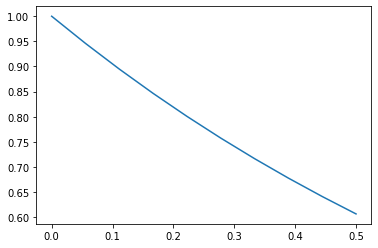

In [40]:
x_lin = np.linspace(0, 0.5, 10)
dt = x_lin[1] - x_lin[0]
#target = torch.Tensor(np.sin(x) + 0.5*np.sin(3*x) + 0.25*np.sin(5*x))
target = torch.Tensor(np.exp(-x_lin))
plt.plot(x_lin, target)
plt.show()

In [41]:
np.random.seed(40)
A = np.random.normal(0,1, (3,3))
A = A + A.T
print(np.linalg.eig(A)[0])
eig = np.linalg.eig(A)[1][:,0]
A = torch.Tensor(A)

[ 2.20448963 -1.72013383 -3.96771928]


In [42]:
epochs = 5000
for epoch in range(epochs):
    loss = 0
    hidden = torch.Tensor(np.zeros((1, 10)))
    x_prev = torch.Tensor([1, 0, 0]).reshape(1, -1)
    x, hidden = model.forward(x_prev, hidden)
    
    for i in range(1, len(x_lin)):  
        x_next, hidden = model.forward(x, hidden)
        
        LHS = (x - x_prev)/dt
        
        x_mid = (x + x_prev)/2
        
        Ax = torch.mv(A, x_mid[0])
        RHS = Ax - torch.dot(x_mid[0], Ax)*x_mid[0]
        
        loss += torch.mean((LHS - RHS)**2)

        x_prev = x
        x = x_next
            
    loss /= len(x_lin) - 1
    if epoch%100 == 0:
        print(f"epoch: {epoch}, loss: {loss.item()}")

    optimizer.zero_grad()   
    loss.backward()
    optimizer.step()

#print(list(model.parameters()))

epoch: 0, loss: 19.07079315185547
epoch: 100, loss: 1.402760624885559
epoch: 200, loss: 0.5370509624481201
epoch: 300, loss: 0.12091508507728577
epoch: 400, loss: 0.0017844829708337784
epoch: 500, loss: 0.0002611939562484622
epoch: 600, loss: 9.804702858673409e-05
epoch: 700, loss: 6.645447137998417e-05
epoch: 800, loss: 5.423436232376844e-05
epoch: 900, loss: 4.753344182972796e-05
epoch: 1000, loss: 4.3268217268632725e-05
epoch: 1100, loss: 4.038631959701888e-05
epoch: 1200, loss: 3.8381345802918077e-05
epoch: 1300, loss: 3.6954832467017695e-05
epoch: 1400, loss: 3.591312997741625e-05
epoch: 1500, loss: 3.512272087391466e-05
epoch: 1600, loss: 3.4493084967834875e-05
epoch: 1700, loss: 3.3970096410484985e-05
epoch: 1800, loss: 3.350082988617942e-05
epoch: 1900, loss: 3.307072620373219e-05
epoch: 2000, loss: 3.2653821108397096e-05
epoch: 2100, loss: 3.224588726880029e-05
epoch: 2200, loss: 3.1842537282500416e-05
epoch: 2300, loss: 3.1436196877621114e-05
epoch: 2400, loss: 3.101642141700

2.18499624790232


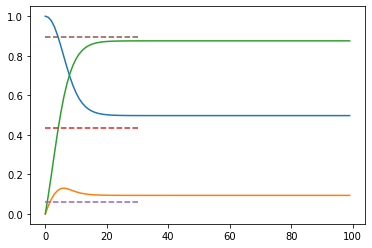

In [49]:
hidden = torch.Tensor(np.zeros((1, 10)))

x_array = [[1, 0, 0]]
hidden_array = [np.array([0,0,0,0,0,0,0,0,0,0])]
x = torch.Tensor([1, 0, 0]).reshape(1, -1)
for i in range(1, 100):
    x, hidden = model.forward(x, hidden)  
    x_array.append(x[0].detach().numpy())
    hidden_array.append(hidden[0].detach().numpy())

x_array = np.array(x_array)

print(x_array[-1]@A.detach().numpy()@x_array[-1]/(x_array[-1]@x_array[-1]))

plt.plot(x_array)
plt.plot((0, 30), (-eig, -eig), "--")
plt.show()

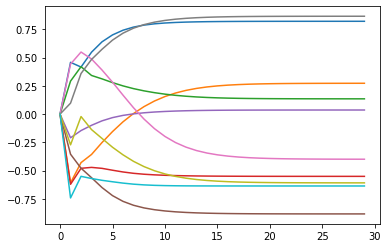

In [24]:
plt.plot(hidden_array)
plt.show()